In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
drivers = results = pd.read_csv("data_raw/drivers.csv")
results = pd.read_csv("data_raw/results.csv")


In [32]:
results.dtypes
drivers.dtypes


driverId        int64
driverRef      object
number         object
code           object
forename       object
surname        object
dob            object
nationality    object
url            object
dtype: object

In [ ]:
results.groupby("driverId").agg(mean_points = ('points','mean'))

In [16]:
drivers_agg = (results.groupby("driverId")
                      .agg(mean_points = ('points','mean'),
                           sd_points =   ('points','std'),
                           min_points =  ('points','min'),
                           max_points =  ('points','max'),
                           count_obs   = ('points',len)))



,mean_points,sd_points,min_points,max_points,count_obs
driverId,,,,,
1,14.182258,9.224098,0.0,50.0,310
2,1.407609,2.372923,0.0,15.0,184
3,7.740291,8.672456,0.0,25.0,206
4,5.756983,6.330721,0.0,25.0,358
5,0.937500,1.969503,0.0,10.0,112
...,...,...,...,...,...
852,1.000000,2.477808,0.0,12.0,44
853,0.000000,0.000000,0.0,0.0,22
854,0.272727,1.335798,0.0,8.0,44


In [43]:
driver_merge = pd.merge(drivers,
                       drivers_agg,
                       on = "driverId",
                       how = "left")

display (driver_merge)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,mean_points,sd_points,min_points,max_points,count_obs
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,14.182258,9.224098,0.0,50.0,310.0
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,1.407609,2.372923,0.0,15.0,184.0
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,7.740291,8.672456,0.0,25.0,206.0
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,5.756983,6.330721,0.0,25.0,358.0
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,0.937500,1.969503,0.0,10.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,0.272727,1.335798,0.0,8.0,44.0
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,0.272727,0.882735,0.0,4.0,22.0
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,2.000000,NaN,2.0,2.0,1.0
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,NaN,NaN,NaN,NaN,NaN


In [62]:
driver_merge[["driverId","dob","mean_points"]].sort_values(by = "mean_points", ascending = False)

,driverId,dob,mean_points
0,1,1985-01-07,14.182258
829,830,1997-09-30,12.168712
19,20,1987-07-03,10.326667
821,822,1989-08-28,8.845771
842,844,1997-10-16,8.262136
...,...,...,...
415,416,1931-05-18,0.000000
416,417,1932-11-30,0.000000
427,428,1930-10-07,0.000000
855,857,2001-04-06,NaN


In [65]:
driver_merge_nation  = (driver_merge.groupby("nationality")
                      .agg(mean_points = ('mean_points','mean'),
                           sd_points =   ('mean_points','std'),
                           min_points =  ('mean_points','min'),
                           max_points =  ('mean_points','max'),
                           count_obs   = ('mean_points',len)))

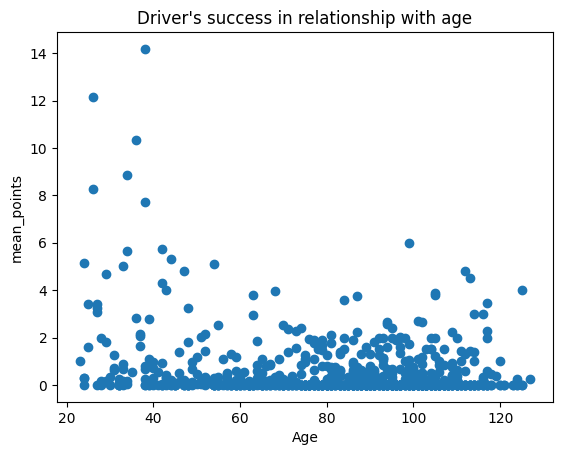

In [60]:
driver_merge["dob"] = pd.to_datetime(driver_merge["dob"])
driver_merge[["driverId","dob","mean_points"]].sort_values(by = "mean_points", ascending = False)
driver_merge["age"] = 2023 - driver_merge["dob"].dt.strftime("%Y").astype(int)

plt.scatter(x= driver_merge["age"], y = driver_merge["mean_points"])
plt.ylabel("mean_points")
plt.xlabel("Age")
plt.title("Driver's success in relationship with age")
plt.show()